In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
dark_horse= cv2.imread("C:/Artificial Intelligence/2_Computer_Vision/1_image_processing/horse.jpg") 
show_horse=cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB) 
#dark_horse is in the form of BGR format 
#and Show_horse is in the RGB format

rainbow= cv2.imread("C:/Artificial Intelligence/2_Computer_Vision/1_image_processing/rainbow.jpg")
show_rainbow=cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks= cv2.imread("C:/Artificial Intelligence/2_Computer_Vision/1_image_processing/bricks.jpg")
show_bricks=cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

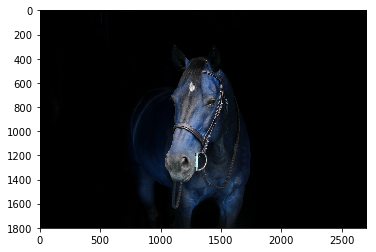

In [11]:
plt.imshow(dark_horse)

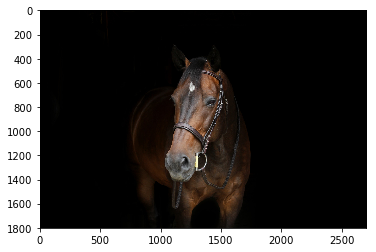

In [13]:
plt.imshow(show_horse)

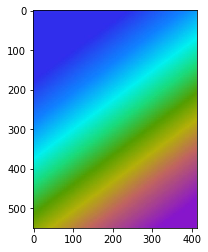

In [14]:
plt.imshow(rainbow)

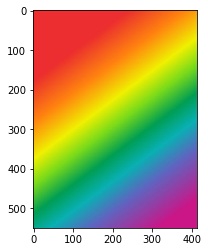

In [8]:
plt.imshow(show_rainbow)

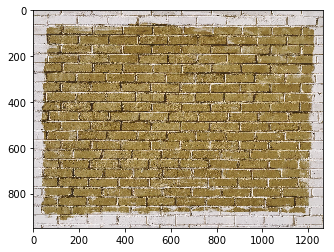

In [15]:
plt.imshow(blue_bricks)

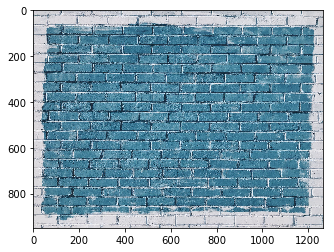

In [12]:
plt.imshow(show_bricks)

#OpenCv Histogram
#uncomplete 

cv2.calcHist(images, channels, mask, histSize, ranges[,hist[, accumulator]])

images:
channels:it is also given in square brackests, It is the index of channel for which we calculate histogram
,for example , if input is grayscale image , it svalue is [0],
[0]
[1]
[2]


In [19]:
hist_values=cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256],ranges=[0,255])

#here the blue channel is used 

In [20]:
hist_values.shape #256 hist size and 1: one channel

(256, 1)

#let us visulaize the contribition of blue channel

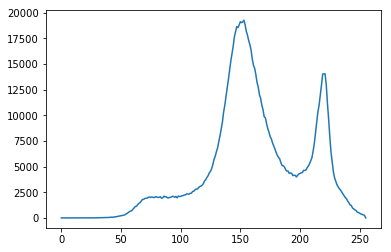

In [23]:

plt.plot(hist_values)

In [26]:
hist_values=cv2.calcHist([blue_bricks], channels=[1], mask=None, histSize=[256],ranges=[0,255])

#here the Greeb channel is used 

In [27]:
hist_values.shape

(256, 1)

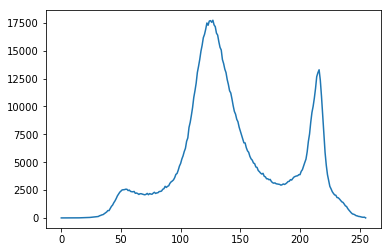

In [28]:
plt.plot(hist_values)

In [29]:
hist_values=cv2.calcHist([blue_bricks], channels=[2], mask=None, histSize=[256],ranges=[0,255])

#here the red channel is used 

In [30]:
hist_values.shape

(256, 1)

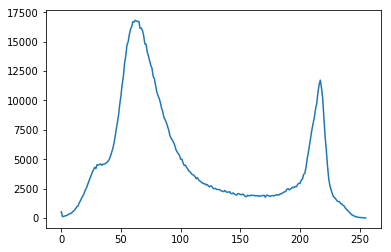

In [31]:
plt.plot(hist_values)

In [32]:
#eqaulization and masking are same

#this is give contribution blue channel in the overall image

In [34]:
hist_values=cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256],ranges=[0,255])

#here the blue channel is used 

In [35]:
hist_values.shape

(256, 1)

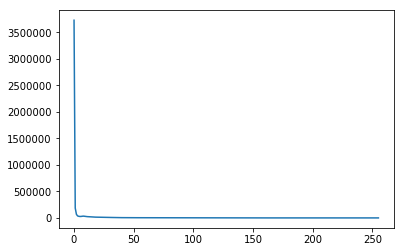

In [36]:
plt.plot(hist_values)

In [38]:
hist_values=cv2.calcHist([dark_horse], channels=[2], mask=None, histSize=[256],ranges=[0,255])

#here the red channel is used 

In [39]:
hist_values.shape

(256, 1)

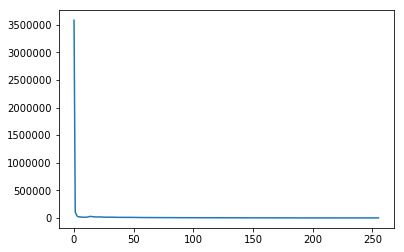

In [40]:
plt.plot(hist_values)

plt.imshow(show_horse)

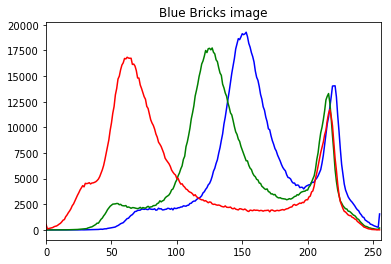

In [41]:
#to check the contribuction of each channel then write this code
img=blue_bricks
color=('b','g','r')
for i , col in enumerate(color):
    histr=cv2.calcHist([img], [i],None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title("Blue Bricks image")
plt.show()

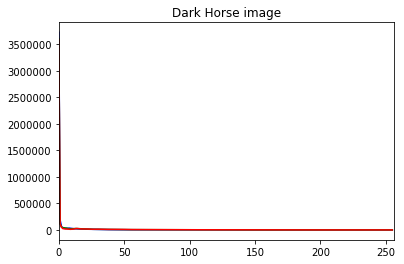

In [45]:
img=dark_horse
color=('b','g','r')
for i , col in enumerate(color):
    histr=cv2.calcHist([img], [i],None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title("Dark Horse image")
plt.show()
#you can not see the contribution of each color or channel so you a=can add the ylim in that

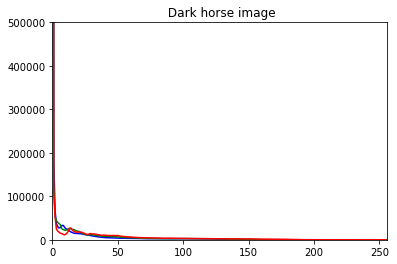

In [47]:
img=dark_horse
color=('b','g','r')
for i , col in enumerate(color):
    histr=cv2.calcHist([img], [i],None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
    plt.ylim(0, 500000)
plt.title(" Dark horse image")
plt.show()

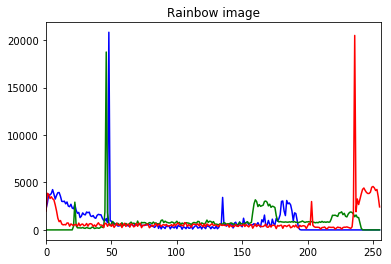

In [133]:
img=rainbow
color=('b','g','r')
for i , col in enumerate(color):
    histr=cv2.calcHist([img], [i],None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title("Rainbow image")
plt.show()

# Masking

1. Masking in Computer Graphics:
Masking is a technique used in computer graphics to hide or obscure part of an image. Masking can be used for aesthetic purposes, to remove unwanted parts of an image, or to change the shape of an image. There are two types of masking: bitmasking and alpha masking. Bitmasking is a method of hiding pixels based on their color values. Alpha masking is a method of hiding pixels based on their opacity. Masking is often used in image editing applications such as Adobe Photoshop and GIMP.

2. Benefits of Masking:

- Variety of effects: Masking is an important concept in computer graphics, and can be used to create a variety of effects. Masking can be used to create transparency, blend two images together, or create a cutout effect.
- Create transparency: Masking can be used to create transparency by setting the opacity of an image. This can be useful for creating ghost effects or for making images appear to fade into the background.
- Blend two images: Masking can also be used to blend two images together. This is often done by using a gradient mask, which allows the two images to slowly blend together. This technique can be used to create a seamless transition between two images.
- Create a cutout effect: Masking can be used to create a cutout effect. This is usually done by using a black-and-white mask, with the black areas being cut out from the image. This technique can be used to isolate an object from its background or to remove unwanted elements from an image.

We can mask only certain part of image 

In [147]:
img=rainbow

In [135]:
img.shape

(550, 413, 3)

We want only (550 , 413) Then you can write img.shape[:2]

In [148]:

#create the mask 
mask= np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400]= 255

In [149]:
print(mask.dtype) #check the mask data type
mask=mask.astype('uint8') #convert mask to uint8 if necessary

uint8


In [150]:
show_rainbow_resized=cv2.resize(show_rainbow, (mask.shape[1], mask.shape[0]))

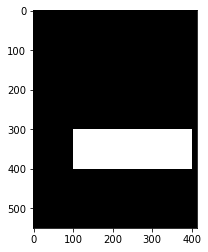

In [139]:
plt.imshow(mask,cmap='gray')

In [151]:
masked_img= cv2.bitwise_and(img, img, mask=mask)
show_masked_img=cv2.bitwise_and(show_rainbow_resized, show_rainbow_resized, mask=mask)

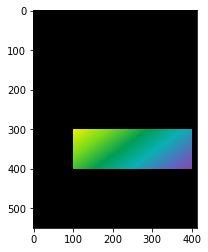

In [141]:
plt.imshow(show_masked_img)

# calculating the Histogram for Rainbow
#once the mask is properly  formmatted , you can safely compute the histogram


In [153]:
hist_mask_values_red=cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256])
hist_full_values_red=cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0,256])

Text(0.5,1,'Histogram for RED values of the full image')

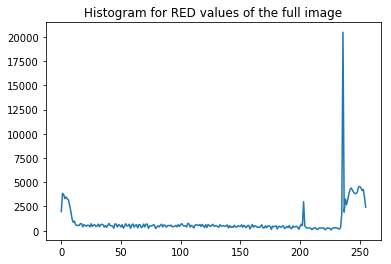

In [154]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5,1,'Histogram for RED values of the mask image')

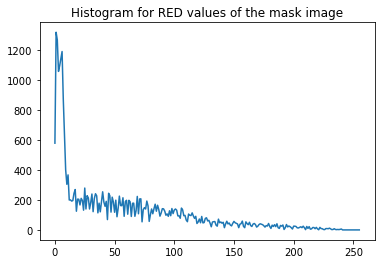

In [156]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values of the mask image')

# ASSIGMENT:- Masking of Gorilla 



In [64]:
dark_gorilla= cv2.imread("C:/Artificial Intelligence/2_Computer_Vision/1_image_processing/gorilla.jpg") 
show_gorilla=cv2.cvtColor(dark_gorilla, cv2.COLOR_BGR2RGB) 

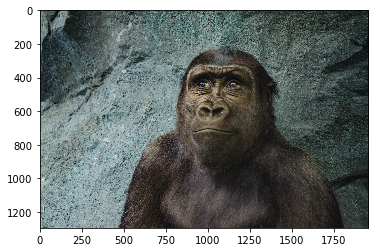

In [65]:
plt.imshow(dark_gorilla)

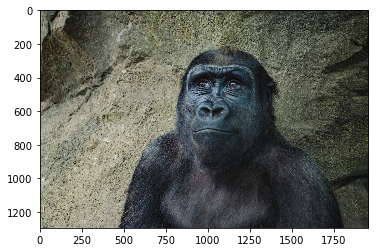

In [66]:
plt.imshow(show_gorilla)

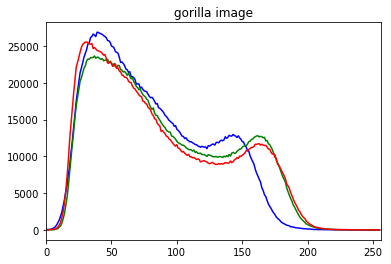

In [74]:
img=dark_gorilla
color=('b','g','r')
for i , col in enumerate(color):
    histr=cv2.calcHist([img], [i],None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title("gorilla image")
plt.show()

In [126]:
#create the mask 
mask= np.zeros(img.shape[:2], np.uint8)
mask[400:480,870:1230]= 255

In [127]:
show_gorilla_resized=cv2.resize(show_gorilla, (mask.shape[1], mask.shape[0]))

In [128]:
show_gorilla_resized=cv2.resize(show_gorilla, (mask.shape[1], mask.shape[0]))

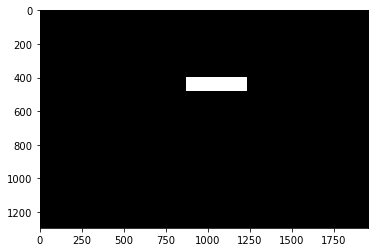

In [129]:
plt.imshow(mask,cmap='gray')

In [130]:
masked_img= cv2.bitwise_and(img, img, mask=mask)
show_gorilla_img=cv2.bitwise_and(show_gorilla_resized, show_gorilla_resized, mask=mask)

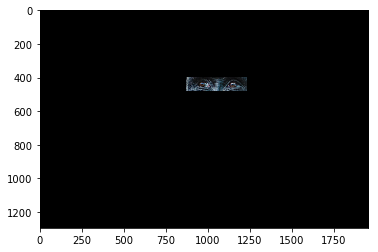

In [131]:
plt.imshow(show_gorilla_img)